## Is it a bird?

In [ ]:

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [ ]:

import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai

## Step 1: Download images of birds and non-birds

In [ ]:
!pip install -U ddgs


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 89.1 MB/s eta 0:00:00


In [ ]:
from ddgs import DDGS
import time

def search_images(keywords, max_images=50, pause=1.0):
    urls = []
    with DDGS() as ddgs:
        for r in ddgs.images(keywords, max_results=max_images):
            urls.append(r["image"])
            time.sleep(pause)
    return urls




In [ ]:
urls = search_images('bird photos', max_images=1)
urls[0]

'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg'

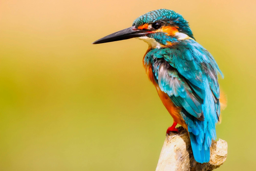

In [ ]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

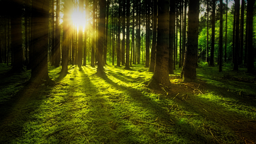

In [ ]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [ ]:
searches = 'forest','bird'
path = Path('images')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

## Step 2: Train our model

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

1

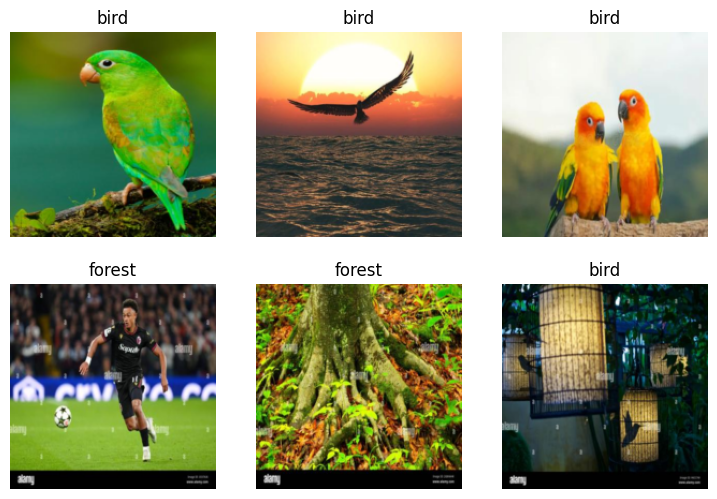

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [ ]:
!pip install -U fastai fastprogress


In [ ]:
from fastai.callback.progress import ProgressCallback

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.remove_cb(ProgressCallback)
learn.fine_tune(3)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 114MB/s]


[0, 0.9967550039291382, 1.6765484809875488, 0.4716981053352356, '00:04']
[0, 0.42879727482795715, 0.5055548548698425, 0.22641509771347046, '00:02']
[1, 0.28926950693130493, 0.18687205016613007, 0.11320751905441284, '00:02']
[2, 0.20851311087608337, 0.14749808609485626, 0.07547169923782349, '00:02']


## Step 3: Use our model (and build your own!)

In [ ]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}\nProbability it's a forest image: {probs[1]:.4f}")

This is a: bird.
Probability it's a bird: 0.9998
Probability it's a forest image: 0.0002


In [ ]:
learn.export('model.pkl')

In [ ]:
from google.colab import files
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r my_images.zip bird_or_not


  adding: bird_or_not/ (stored 0%)
  adding: bird_or_not/bird/ (stored 0%)
  adding: bird_or_not/bird/2dcd4b1d-9318-426a-b36d-05efd07bfdba.jpg (deflated 1%)
  adding: bird_or_not/bird/0aaf206e-e49e-4de0-9dd3-85f64cc23f99.jpg (deflated 1%)
  adding: bird_or_not/bird/6c984e5b-6d04-431a-8f68-a560550a912c.jpg (deflated 2%)
  adding: bird_or_not/bird/d4910607-8b3c-4a3f-961a-6a82fe26f0b6.jpg (deflated 5%)
  adding: bird_or_not/bird/df7a9d93-e842-45f9-8e4c-06359efaf42f.jpg (deflated 1%)
  adding: bird_or_not/bird/377ede97-e7c7-42f3-8a77-e48f702fc053.jpg (deflated 4%)
  adding: bird_or_not/bird/bef3d2ef-66ba-4761-9852-88b3f0ae0ad5.jpeg (deflated 0%)
  adding: bird_or_not/bird/49cde8e6-84cb-4c4f-9319-a37b10cdd1c5.jpg (deflated 2%)
  adding: bird_or_not/bird/3adf412d-d4c8-4a96-87a9-571e3c622763.jpg (deflated 2%)
  adding: bird_or_not/bird/936d0205-c65a-45cb-a055-5a560e797edb.jpg (deflated 1%)
  adding: bird_or_not/bird/bed64c3a-17f8-44da-92b1-3b4580612649.png (deflated 0%)
  adding: bird_or_not/